# 2022 League of Legends Champion Analysis
#### A Tutorial on Finding the Strongest Champions in Professional League of Legends Across 2022
By Eric Wang
___

#### Table of Contents
1. [Introduction](#introduction)
2. [Data Collection and Cleaning](#Data-Collection-and-Cleaning)
3. [Exploratory Analysis](#Exploratory-Analysis)
4. [Hypothesis Testing](#Hypothesis-Testing)
5. [Conclusion](#Conclusion)
___

## Introduction
League of Legends is a MOBA (Multiplayer Online Battle Arena) game developed by Riot Games, released in October 2009 in North America. It has steadily grown in popularity since then, and at present, has 180 million registered players across the world, with an average of 10 to 11 million concurrent daily players. A match of "Summoner's Rift", the most popular game mode in League of Legends, consists of 10 players split into 2 teams, aiming to destroy a "Nexus" structure in the other team's base that is guarded by multiple "turret" towers and the enemy team's players. Over the course of the match, players will kill enemy minions and players to earn experience points and gold, using them to level up and buy items respectively to strengthen their character (aka "champion"), increasing their odds of winning. Additionally, there are various "objectives" on the map which serve to strengthen a team's position in the match, strengthening the players directly and/or empowering their ability to destroy enemy turrets. As of writing this, players can choose to play as 1 of 161 champions, and can buy 6 out of over 100 possible items, in a single match. A full basic rundown can be found [at this link](https://mobalytics.gg/blog/absolute-beginners-guide-to-league-of-legends/).     


A team's ability to win matches in League of Legends is often summarized by 3 major points:
1. Team composition - how well your team's champions synergize with each other, what their strengths are, and how well they do against the enemy team's champions.
2. Micro - an individual player's skill with the champion they are playing.
3. Macro - a player/team's ability to to look at the "bigger picture". This includes securing the aforementioned objectives, decision-making on where to go, tracking enemy champions, and more.

A player's macro and micro is very difficult to measure objectively, but it is possible to look through many matches of League of Legends to see if there is a correlation between champion matchups and win rate. However, the League of Legends "meta" - or strongest play style - is constantly evolving. Top level players constantly discover new ways to play existing champions as a result of updates and experimentation, so the meta at any given point can be difficult to pin down. This is further the case with professional League of Legends, since there are far less people making guides or videos explaining professional League of Legends matches.    

Data on professional League of Legends matches in 2022 across all regions have been gathered from [this website](https://oracleselixir.com/tools/downloads). This tutorial aims to analyze what champions most consistently lead to the highest win rate in professional League of Legends in 2022. Additionally, this tutorial will also try to focus on how champion strength has changed across patches (aka updates) in 2022. It is my hope that this analysis allows everyone to gain more interest in professional League of Legends, and for experienced players with less interest in professional League of Legends (like myself) to definitively see how the professional "meta" of League of Legends has evolved over the year.
___

## Data Collection and Cleaning
First, we need to import a Python package to load and parse the data into a useful form. Specifically, we are using [pandas](https://pandas.pydata.org/pandas-docs/stable/) to load the spreadsheet of data into a Dataframe, a data structure similar to a spreadsheet that is easy to manipulate with Python.

In [1]:
import pandas as pd

After downloading the Excel spreadsheet for 2022 match data from [this website](https://oracleselixir.com/tools/downloads), we then use pandas to load it into a Dataframe. 

In [2]:
complete_df = pd.read_csv("2022_LoL_esports_match_data_from_OraclesElixir.csv")
complete_df.head()

C:\Users\eric\AppData\Local\Temp\ipykernel_23380\2811257755.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  complete_df = pd.read_csv("2022_LoL_esports_match_data_from_OraclesElixir.csv")


,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,121.0,391.0,345.0,14.0,0.0,1.0,0.0,0.0,1.0,0.0
1,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,100.0,541.0,-275.0,-11.0,2.0,3.0,2.0,0.0,5.0,1.0
2,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,119.0,-475.0,153.0,1.0,0.0,3.0,0.0,3.0,3.0,2.0
3,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,149.0,-793.0,-1343.0,-34.0,2.0,1.0,2.0,3.0,3.0,0.0
4,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,21.0,443.0,-497.0,7.0,1.0,2.0,2.0,0.0,6.0,2.0


#### Cleaning Up the Data
There are a large number of columns here, corresponding to a wide variety of stats such as kills/assists after a certain amount of time, the number of minions/monsters killed, and more. Since this tutorial will focus on champion choice, we can focus on just a few of these columns. We can select a subset of the above columns to analyze: a way to identify each unique match, the champion choice, the champion bans (which are forbidden from being chosen for that match), the patch version, and the result of that match (where 0 is a loss and 1 is a win).

In [3]:
champion_df = complete_df[['gameid', 'patch', 'champion', 'ban1', 'ban2', 'ban3', 'ban4', 'ban5', 'result']]
champion_df.head(10)

,gameid,patch,champion,ban1,ban2,ban3,ban4,ban5,result
0,ESPORTSTMNT01_2690210,12.01,Renekton,Karma,Caitlyn,Syndra,Thresh,Lulu,0
1,ESPORTSTMNT01_2690210,12.01,Xin Zhao,Karma,Caitlyn,Syndra,Thresh,Lulu,0
2,ESPORTSTMNT01_2690210,12.01,LeBlanc,Karma,Caitlyn,Syndra,Thresh,Lulu,0
3,ESPORTSTMNT01_2690210,12.01,Samira,Karma,Caitlyn,Syndra,Thresh,Lulu,0
4,ESPORTSTMNT01_2690210,12.01,Leona,Karma,Caitlyn,Syndra,Thresh,Lulu,0
5,ESPORTSTMNT01_2690210,12.01,Gragas,Lee Sin,Twisted Fate,Zoe,Nautilus,Rell,1
6,ESPORTSTMNT01_2690210,12.01,Viego,Lee Sin,Twisted Fate,Zoe,Nautilus,Rell,1
7,ESPORTSTMNT01_2690210,12.01,Viktor,Lee Sin,Twisted Fate,Zoe,Nautilus,Rell,1
8,ESPORTSTMNT01_2690210,12.01,Jinx,Lee Sin,Twisted Fate,Zoe,Nautilus,Rell,1
9,ESPORTSTMNT01_2690210,12.01,Alistar,Lee Sin,Twisted Fate,Zoe,Nautilus,Rell,1


We can clean this up a little by dropping any rows with no data in any of the columns.

In [4]:
champion_df = champion_df.dropna()

Our result is a Dataframe where each column contains data relevant to our goal (finding out how strong certain champions are in 2022), and each row contains the data for a single player in a single match.
___

## Exploratory Analysis
There are 3 ways we want to analyze our data. Our exploratory analysis can give us a visual representation of which champion choices were most signficant to victory without any modification to the Dataframe, with all patches included. We will then group the data by patch, perform analysis on individual patches, and see how the strength of different champions changes based on the patch.  

To visualize our data, we can use a package called [matplotlib](https://matplotlib.org/), which is very useful for plotting data.

In [5]:
import matplotlib
import matplotlib.pyplot as plt

One difficulty about this particular analysis is that all of our data is categorical, instead of numerical. It is difficult to make any sort of meaningful numerical graph with the champion names above, since if the result is our y-axis, we effectively have no good variable to set as our x-axis. Instead, what we can do is calculate the win rate of each champion using Dataframe functions, adding them to a dictionary, and then plotting the dictionary on a bar graph.

In [6]:
wins_games = dict()

#Associates each champion with a list representing (number of wins, number of matches)
for i, player in champion_df.iterrows():
    if player["champion"] not in wins_games:
        wins_games[player["champion"]] = [player["result"], 1]
    else:
        wins_games[player["champion"]] = [wins_games[player["champion"]][0] + player["result"], wins_games[player["champion"]][1] + 1]

wins_games

{'Renekton': [590, 1263],
 'Xin Zhao': [1309, 2653],
 'LeBlanc': [574, 1212],
 'Samira': [133, 269],
 'Leona': [1282, 2543],
 'Gragas': [540, 1220],
 'Viego': [1774, 3764],
 'Viktor': [1062, 2168],
 'Jinx': [1941, 3860],
 'Alistar': [397, 801],
 'Lee Sin': [1403, 2753],
 'Orianna': [481, 988],
 'Jhin': [539, 1146],
 'Rakan': [1004, 1913],
 'Gangplank': [726, 1344],
 'Nidalee': [77, 167],
 'Syndra': [408, 860],
 'Gwen': [1391, 2666],
 'Jarvan IV': [639, 1271],
 'Nautilus': [2113, 4316],
 'Jax': [344, 666],
 'Vex': [477, 977],
 'Aphelios': [1948, 3953],
 'Thresh': [684, 1299],
 'Talon': [34, 61],
 'Zoe': [286, 567],
 'Yuumi': [572, 1168],
 'Graves': [886, 1788],
 'Rumble': [88, 160],
 'Corki': [727, 1415],
 'Twisted Fate': [287, 512],
 'Ziggs': [101, 239],
 'Caitlyn': [378, 716],
 'Lux': [193, 363],
 'Yone': [302, 618],
 'Akali': [777, 1490],
 'Pyke': [160, 292],
 'Jayce': [603, 1150],
 'Sett': [310, 634],
 'Sylas': [975, 1881],
 'Karma': [658, 1517],
 'Lulu': [646, 1457],
 'Ryze': [709,

Scrolling through the wins:games ratios of various champions, it becomes clear that many champions are significantly more popular than others in professional League of Legends, and champions with too little data to make an accurate portrayal of their strength may end up becoming problematic. So at this point, it is safe for us to think of a cutoff for the number of games a champion must have in order to be included in the dataset. In my case, I chose at least 200 games.

In [7]:
#Removing champions with less than 200 games played
wins_games2 = dict()
for champion in wins_games:
    if wins_games[champion][1] >= 200:
        wins_games2[champion] = wins_games[champion]

#Associate each champion with their win rate  
win_rate = dict()
for champion in wins_games2:
    win_rate[champion] = float(wins_games2[champion][0]/wins_games2[champion][1])
win_rate

{'Renekton': 0.4671417260490895,
 'Xin Zhao': 0.49340369393139843,
 'LeBlanc': 0.4735973597359736,
 'Samira': 0.4944237918215613,
 'Leona': 0.5041289815178922,
 'Gragas': 0.4426229508196721,
 'Viego': 0.47130712008501596,
 'Viktor': 0.48985239852398527,
 'Jinx': 0.5028497409326425,
 'Alistar': 0.49563046192259674,
 'Lee Sin': 0.5096258626952416,
 'Orianna': 0.4868421052631579,
 'Jhin': 0.47033158813263526,
 'Rakan': 0.5248301097752222,
 'Gangplank': 0.5401785714285714,
 'Syndra': 0.4744186046511628,
 'Gwen': 0.521755438859715,
 'Jarvan IV': 0.5027537372147916,
 'Nautilus': 0.48957367933271545,
 'Jax': 0.5165165165165165,
 'Vex': 0.4882292732855681,
 'Aphelios': 0.4927902858588414,
 'Thresh': 0.5265588914549654,
 'Zoe': 0.5044091710758377,
 'Yuumi': 0.4897260273972603,
 'Graves': 0.4955257270693512,
 'Corki': 0.5137809187279152,
 'Twisted Fate': 0.560546875,
 'Ziggs': 0.4225941422594142,
 'Caitlyn': 0.5279329608938548,
 'Lux': 0.5316804407713499,
 'Yone': 0.4886731391585761,
 'Akali': 0

With these win rates, we can now construct a bar graph using matplotlib. 

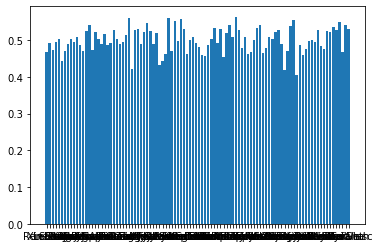

In [8]:
f, ax = plt.subplots()
plt.bar(range(len(win_rate)), list(win_rate.values()), tick_label=list(win_rate.keys()))
plt.show()

Even if we change the size of the graph, this is definitely too much. Let's try sorting the dictionary and using the top 15 champions with the highest win rates.

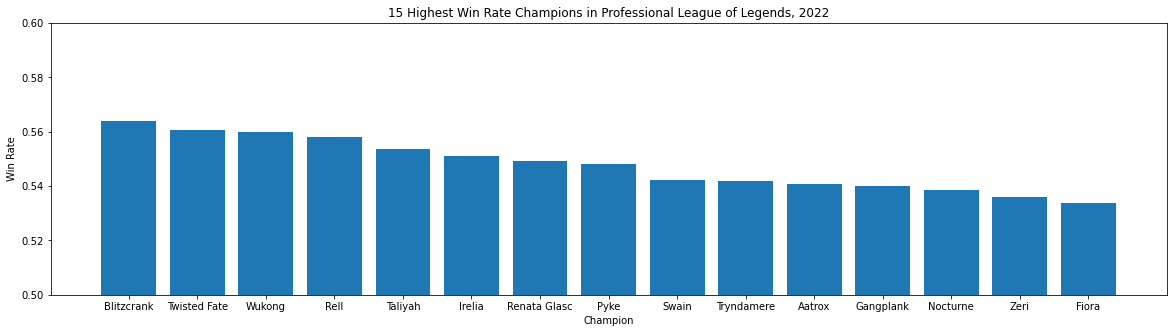

In [9]:
sorted_champions = sorted(win_rate.keys(), key=lambda x:win_rate[x], reverse=True)
sorted_win_rates = sorted(win_rate.values(), reverse=True)

f, ax = plt.subplots(figsize=(20, 5))
plt.bar(range(15), sorted_win_rates[:15], tick_label=sorted_champions[:15])

plt.title("15 Highest Win Rate Champions in Professional League of Legends, 2022")
plt.xlabel("Champion")
plt.ylabel("Win Rate")
plt.ylim(.5, .6)
plt.show()

#### Visualization by Patch
The next step is to visualize win rate by patch, which we can do by selecting subsets of the Dataframe based on the "patch" column, and making a separate bar graph for each one. Since the number of games is reduced, the cutoff for number of games should also be reduced. In my case, I have chosen games with at least 20 matches.  

The process for visualizing the data is similar.

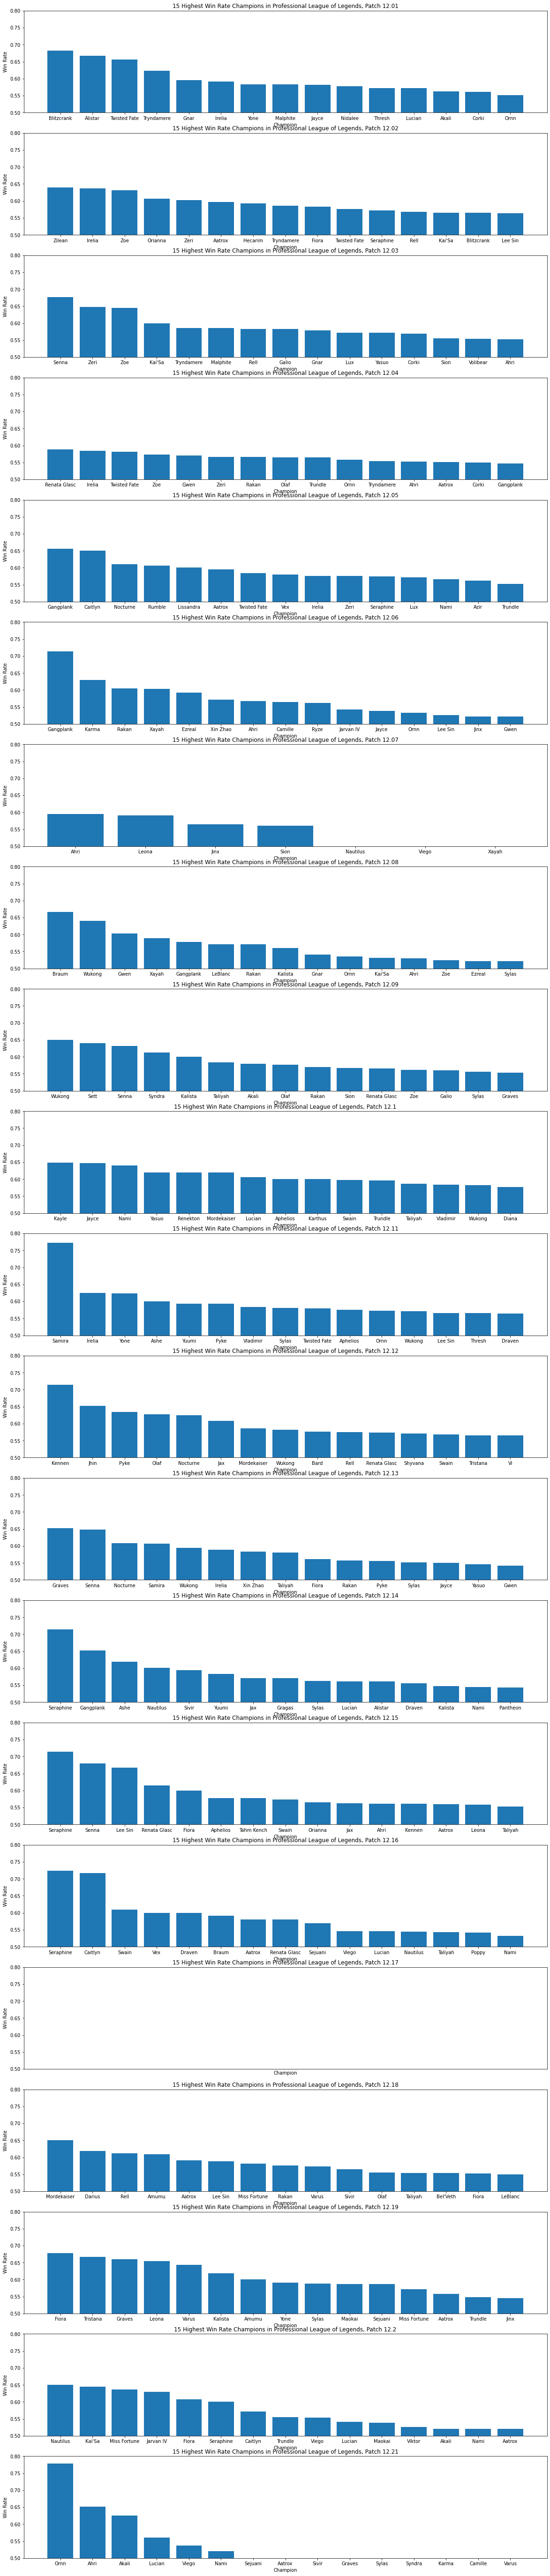

In [10]:
patches = list(champion_df["patch"].unique())
f, axes = plt.subplots(len(patches), figsize=(20, 100))
for i in range(len(patches)):
    #Finding the initial wins:games ratio
    wins_games = dict()
    for j, player in champion_df[champion_df["patch"] == patches[i]].iterrows():
        if player["champion"] not in wins_games:
            wins_games[player["champion"]] = [player["result"], 1]
        else:
            wins_games[player["champion"]] = [wins_games[player["champion"]][0] + player["result"], wins_games[player["champion"]][1] + 1]
    wins_games2 = dict()
    #Removing champions with too few games
    for champion in wins_games:
        if wins_games[champion][1] >= 20:
            wins_games2[champion] = wins_games[champion]
    #Converting to win rate
    win_rate = dict()
    for champion in wins_games2:
        win_rate[champion] = float(wins_games2[champion][0]/wins_games2[champion][1])
    #Turning to bar graph
    sorted_champions = sorted(win_rate.keys(), key=lambda x:win_rate[x], reverse=True)
    sorted_win_rates = sorted(win_rate.values(), reverse=True)
    
    axes[i].set_title("15 Highest Win Rate Champions in Professional League of Legends, Patch " + str(patches[i]))
    axes[i].set_xlabel("Champion")
    axes[i].set_ylabel("Win Rate")
    axes[i].set_ylim(.5, .8)
    
    axes[i].bar(range(len(sorted_champions[:15])), sorted_win_rates[:15], tick_label=sorted_champions[:15])
plt.show()

It is clear from these graphs that the performance of different champions changes from patch to patch, though there is some consistency - for example, Seraphine remaining by far the highest win rate champion from patches 12.14 through 12.16, and certain names showing up repeatedly across all of the graphs. However, in order to get any more specific information on the influence of patch on champion win rate, we will need to quantifiably analyze the dataset.
___

## Hypothesis Testing
Our main goal is to analyze how different champion choices affect the likelihood of victory, and how that changes by patch. First, we need to import a package called [statsmodels](https://www.statsmodels.org/stable/index.html), which contains many functions to help with statistical analysis.

In [11]:
import statsmodels.formula.api as smf

For the first hypothesis, that champion choice has a significant effect on win rate, our null hypothesis is that the champion choice is insigificant to victory.   

In order to account for all the categorical values during statistical analysis, we use an argument in statsmodels' ols function. 

In [12]:
est = smf.ols(formula='result ~ C(champion)', data=champion_df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 result   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.835
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           5.56e-30
Time:                        23:29:13   Log-Likelihood:                -87498.
No. Observations:              120870   AIC:                         1.753e+05
Df Residuals:                  120708   BIC:                         1.769e+05
Df Model:                         161                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.5406      0.014     39.835      0.000       0.514       0.567
C(champion)[T.Ahri]              -0.0118      0.016     -0.718      0.473      -0.044       0.020
C(champion)[T.Akali]             -0.0191      0.019     -1.021      0.307      -0.056       0.018
C(champion)[T.Akshan]            -0.0356      0.038     -0.936      0.349      -0.110       0.039
C(champion)[T.Alistar]           -0.0450      0.022     -2.021      0.043      -0.089      -0.001
C(champion)[T.Amumu]             -0.0373      0.027     -1.374      0.170      -0.091       0.016
C(champion)[T.Anivia]            -0.0725      0.074     -0.979      0.328      -0.218       0.073
C(champion)[T.Annie]             -0.0406      0.134     -0.303      0.762      -0.304       0.222
C(champion)[T.Aphelios]          -0.0478      0.016     -3.042      0.002      -0.079      -0.017
C(champion)[T.Ashe]              -0.0609      0.029     -2.131      0.033      -0.117      -0.005
C(champion)[T.Aurelion Sol]       0.2927      0.204      1.433      0.152      -0.108       0.693
C(champion)[T.Azir]              -0.0403      0.018     -2.240      0.025      -0.076      -0.005
C(champion)[T.Bard]              -0.0253      0.041     -0.611      0.541      -0.106       0.056
C(champion)[T.Bel'Veth]          -0.0112      0.036     -0.309      0.757      -0.082       0.060
C(champion)[T.Blitzcrank]         0.0234      0.037      0.632      0.527      -0.049       0.096
C(champion)[T.Brand]              0.0149      0.167      0.089      0.929      -0.312       0.342
C(champion)[T.Braum]             -0.0843      0.020     -4.157      0.000      -0.124      -0.045
C(champion)[T.Caitlyn]           -0.0127      0.023     -0.550      0.582      -0.058       0.033
C(champion)[T.Camille]           -0.0323      0.019     -1.707      0.088      -0.069       0.005
C(champion)[T.Cassiopeia]        -0.0644      0.039     -1.662      0.097      -0.140       0.012
C(champion)[T.Cho'Gath]          -0.0947      0.060     -1.588      0.112      -0.212       0.022
C(champion)[T.Corki]             -0.0268      0.019     -1.414      0.157      -0.064       0.010
C(champion)[T.Darius]             0.0233      0.040      0.577      0.564      -0.056       0.103
C(champion)[T.Diana]             -0.0604      0.024     -2.544      0.011      -0.107      -0.014
C(champion)[T.Dr. Mundo]         -0.1487      0.060     -2.495      0.013      -0.266      -0.032
C(champion)[T.Draven]            -0.0396      0.026     -1.524      0.127      -0.091       0.011
C(champion)[T.Ekko]              -0.0751      0.067     -1.122      0.262      -0.206       0.056
C(champion)[T.Elise]             -0.0740      0.092     -0.802      0.422      -0.255       0.107
C(champion)[T.Evelynn]            0.0149     

The second table in the summary shows a list of all champion, a coefficient indicating their influence towards the result (win or loss), and other useful statistics. A negative coefficient indicates that the champion contributes more towards a loss than a win, and visa versa. Unfortunately, however, the p-values of many of these statistics (indicated in the column "P>|t|") is much larger than an acceptable value (the standard being less than 0.05). 

In [13]:
significant_count = 0
for i in range(len(est.pvalues)):
    if est.pvalues[i] < 0.05:
        significant_count += 1
significant_count

62

62 out of 162 calculated coefficients have p-values low enough to be considered statistically significant, 1 of them being the intercept which does not correspond to a champion at all. This indicates that for the majority of champions, simply choosing them in a professional game in 2022 had little influence on the overall outcome of the game. As for the influence that those champions had...  

In [14]:
significant_influences = dict()
for key, value in est.params.iteritems():
    if est.pvalues[key] < 0.05:
        significant_influences[key] = value
champions = sorted(significant_influences.keys(), key=lambda x: abs(est.params[x]), reverse=True)
influences = sorted(significant_influences.values(), key =lambda x: abs(x), reverse=True)
for i in range(len(champions)):
    print(champions[i] + ": " + str(influences[i]))

Intercept: 0.5406203840472648
C(champion)[T.Teemo]: -0.3098511532780351
C(champion)[T.Garen]: -0.305326266400205
C(champion)[T.Xerath]: -0.18184175809306696
C(champion)[T.Nasus]: -0.16357120371939696
C(champion)[T.Dr. Mundo]: -0.148728492155375
C(champion)[T.Kassadin]: -0.14336011007466207
C(champion)[T.Urgot]: -0.1423902955516877
C(champion)[T.Taric]: -0.14062038404726585
C(champion)[T.Kayn]: -0.1381813596570205
C(champion)[T.Soraka]: -0.13636506489833017
C(champion)[T.Udyr]: -0.12293745721799787
C(champion)[T.Ziggs]: -0.11802624178784893
C(champion)[T.Kog'Maw]: -0.11353705071393061
C(champion)[T.Karma]: -0.10686956005253966
C(champion)[T.Shen]: -0.10372718016377108
C(champion)[T.Gragas]: -0.09799743322758961
C(champion)[T.Lulu]: -0.09724358240004573
C(champion)[T.Malphite]: -0.08607492950181042
C(champion)[T.Braum]: -0.08425674768362697
C(champion)[T.Ezreal]: -0.0815082345145591
C(champion)[T.Vi]: -0.08058486006857891
C(champion)[T.Ryze]: -0.07903184238059774
C(champion)[T.Karthus]: 

All of the most significant champion choices contributed negatively to the outcome, with the worst choices by far being Teemo and Garen. This actually makes sense, since both champions have been considered to be laughably bad in the professional League of Legends scene for a long time.  

And finally, we can see what sort of effect the patch version when it interacts with the champion choice. Though it is loaded as a float value, the number itself is insigificant of meaning, and so should be treated as a categorical value. Unfortunately, since this is effectively calculating the influence of over 21 x 160 variables, it takes an incredibly long time to load. 

In [15]:
#est2 = smf.ols(formula='result ~ C(patch) * C(champion)', data=champion_df).fit()
#est2.summary()
#This will take forever. Do not do it.

Instead, we will separate the Dataframe by patches again, and analyze each patch individually. We are specifically looking for patches where there are more significant values than in the overall summary, to show that certain patches placed more significance on champion selection.

In [21]:
for patch in champion_df["patch"].unique():
    patch_df = champion_df[champion_df["patch"] == patch]
    est = smf.ols(formula = 'result ~ C(champion)', data=patch_df).fit()
    significant_count = 0
    for i in range(len(est.pvalues)):
        if est.pvalues[i] < 0.05:
            significant_count += 1
    if significant_count >= 62:
        print("Patch " + str(patch) + " places more significance on champion selection than overall in 2022.")

Since nothing was printed, we assume that no patch will show anything of more significance than the overall Dataframe.  
___

## Conclusion
In the end, aside from certain outlying champion choices that seem to be very detrimental to a professional team's chances at winning (still looking at Teemo and Garen), it seems that in the end, champion choice does not have a massive influence over the outcome of a professional match in 2022. The regression analysis of the influence of champions on the outcome of a match showed that very few choices held significance, and those that did almost always had a negative influence. This to me says that while there are many champions that are much less favorable to play in 2022, any choice beside those champions holds little sway. This is an understandable conclusion, considering how many factors are involved in achieving victory - in fact, we discussed 2 entire other major factors in the introduction to this tutorial. Any sort of in-depth analysis or prediction model that is capable of accurately guessing the outcome of a game before it begins would have to be incredibly complicated, tapping into various player statistics, opposing champion matchups, and team champion synergies in order to predict the outcome. It was fun to go over the data lifecycle with a game that has been with me for such a long time.